# Logistička regresija

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(10)

U zadatku binarne klasifikacije, ciljna promenljiva može imati dve vrednosti. Njih obično obeležavamo sa `0` i `1` ili `-1` i `1`. Za klasu kojoj je pridruženo obeležje `0` (ili `-1`) kažemo da je **negativna** klasa, dok za klasu kojoj je pridruženo obeležje `1` kažemo da je **pozitivna** klasa. 

**Logistička regresija** (engl. logistic regression) je jedan od osnovnih modela binarne klasifikacije. Ona pretpostavlja linearnu vezu između ulaznih veličina $X_1$, $X_2$, ..., $X_m$. Ciljna funkcija logističke regresije je zadata formulom $$f_\beta(X)= \frac{1}{1+e^{-(\beta_0 + \beta_1X_1 + \ldots + \beta_mX_m)}} = \frac{1}{1+e^{-\beta^T X}} = \sigma(\beta^TX)$$ gde je $\sigma(x)$ sigmoidna funkcija određena jednačinom $\sigma(x) = \frac{1}{1+e^{-x}}$. Vrednost ciljne funkcije se može interpretirati kao verovatnoća pripadnosti određenoj klasi: ukoliko je njena vrednost veća od 0.5, klasifikator predviđa pozitivnu klasu, dok u suprotnom predviđa negativnu klasu. 

## Sigmoidna funkcija

Nacrtaćemo grafik sigmoidne funkcije na ekvidistantnoj mreži 100 tačaka u intervalu od [-10, 10].

In [3]:
N = 100
x = np.linspace(-10, 10, N)
y = 1/(1 + np.exp(-x))

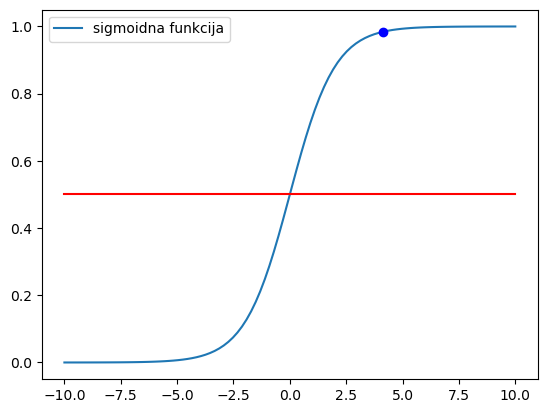

In [4]:
plt.plot(x, y, label = 'sigmoidna funkcija')
plt.plot(x, [0.5]*N, color = 'red')
plt.plot(x[70], y[70], color='blue', marker='o')
plt.legend(loc = 'best')
plt.show()

Ukoliko je vrednost sigmoidne funkcije u tački `x` veća od `0.5`, njoj se pridružuje obeležje `1`. U suprotnom joj se pridružuje obeležje `0`.

Sigmoidna funkcija $\sigma(x)$ je zapravo neprekidna aproksimacija indikatorske funkcije $I(x\geq0)$. To znači da je sigmoidnom funkcijom $\sigma(x)$ definisan model koji vrši klasifikaciju tačaka u odnosu na pravu $x = 0$. Analogno, model određen sa $\sigma(\beta_0 + \beta_1X_1 + \cdot\cdot\cdot + \beta_mX_m)$ vrši klasifikaciju tačaka u odnosu na hiperravan $\beta_0 + \beta_1X_1 + \cdot\cdot\cdot + \beta_mX_m = 0$.

<img src="assets/sigmoid_class_bound.png" width=700>

Posmatrajmo model određen sa $f_{\beta_0, \beta_1}(x) = \sigma(\beta_0 + \beta_1x)$. Podešavanjem parametra $\beta_0$ kontroliše se gde će biti granica između klasa ($x = -\frac{\beta_0}{\beta_1}$), dok se podešavanjem parametra $\beta_1$ kontroliše strmost nagiba sigmoidne funkcije u okolini tačke $-\frac{\beta_0}{\beta_1}$, odnosno sigurnost modela u svoja predviđanja. Što je vrednost parametra $\beta_1$ veća, to je sigmoidna funkcija bliža indikatorskoj funkciji. U graničnom slučaju (kada $\beta_1 \rightarrow +\infty$), to bi značilo da je model sasvim siguran da su sve instance za koje je $x < -\frac{\beta_0}{\beta_1}$ instance negativne klase, a sve instance za koje je $x > -\frac{\beta_0}{\beta_1}$ instance pozitivne klase.

<img src="assets/sigmoid_parameter_variation.png" width=750>

## Unakrsna entropija

Parametri modela logističke regresije $\beta_0$, $\beta_1$, ..., $\beta_m$ se određuju minimizacijom funkcije gubitka. U slučaju logističke regresije to je `unakrsna entropija` (engl. binary crossentropy) određena izrazom $$-\sum_{i=1}^{N} (y_i logf_\beta(x_i) + (1-y_i)log(1-f_\beta(x_i)))$$ u kojem $(x_i, y_i)$ predstavljaju instance skupa za treniranje, a $N$ ukupan broj instanci ovog skupa.

Nacrtaćemo grafike funkcija $log(y)$ i $1-log(y)$ koji figurišu u izrazu unakrsne entropije sa idejom da bolje razumemo način na koji se izračunava greška.

Za iscrtavanje grafika funkcije iskoristićemo ekvidistantnu mrežu 50 tačaka iz intervala [0, 1].

In [5]:
N = 50
y_i = np.linspace(0, 1, N, endpoint=True)

# vrednosti funkcije log(y)
loss_part_positive = -np.log(y_i) 

# vrednosti funkcije log(1-y)
loss_part_negative = -np.log(1-y_i)

/tmp/ipykernel_31375/3882182201.py:5: RuntimeWarning: divide by zero encountered in log
  loss_part_positive = -np.log(y_i)
/tmp/ipykernel_31375/3882182201.py:8: RuntimeWarning: divide by zero encountered in log
  loss_part_negative = -np.log(1-y_i)


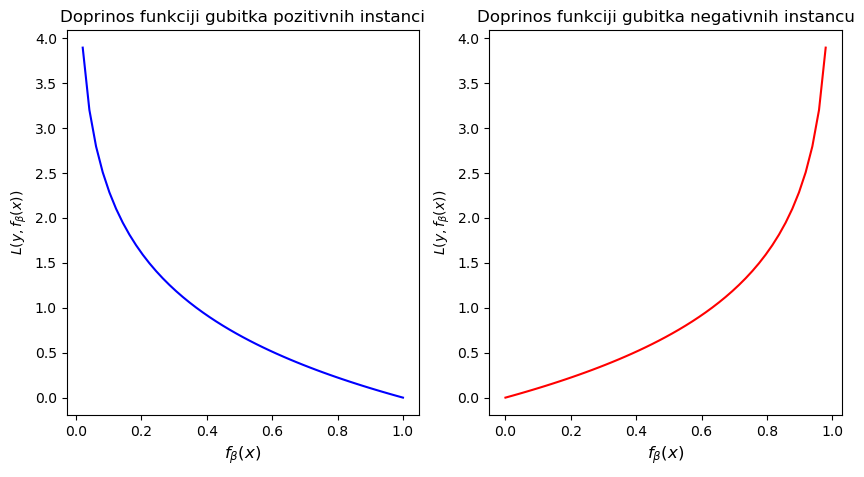

In [6]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.title('Doprinos funkciji gubitka pozitivnih instanci')
plt.xlabel(r'$f_\beta(x)$', fontsize=12)
plt.ylabel(r'$L(y, f_\beta(x))$')
plt.plot(y_i, loss_part_positive, color ='b')

plt.subplot(1, 2, 2)
plt.title('Doprinos funkciji gubitka negativnih instancu')
plt.xlabel(r'$f_\beta(x)$', fontsize=12)
plt.ylabel(r'$L(y, f_\beta(x))$')
plt.plot(y_i, loss_part_negative, color ='r')

plt.show()

Ako je za instancu $(x_i, y_i)$ očekivana vrednost klasifikatora $1$, što više grešimo sa predikcijom $y_i$ i što više odstupamo od očekivane vrednosti, veći je i doprinos funkciji gubitka (grafik levo). Ako je očekivana vrednost klasifikatora $0$, što više odstupamo od ove vrednosti, veći je doprinos funkciji gubitka (grafik desno). 

# Primer binarne klasifikacije

U primeru koji sledi model logističke regresije biće iskorišćen za klasifikaciji tumora dojke na maligne i benigne. Koristićemo Viskonsis skup podataka o kojem se može više pročitati na zvaničnom [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) sajtu.

In [7]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

Podatke Viskonsins skupa možemo učitati koristeći `load_breast_cancer` funkciju paketa `datasets`.

In [8]:
data = datasets.load_breast_cancer()

### Analiza podataka

Više informacija o učitanom skupu podataka kožemo dobiti ispisom svojstva `data.DESCR`.

In [9]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Svaka instanca skupa opisana je sa 30 različitih atributa. Njihove nazive možemo izdvojiti pomoću atributa  `feature_names`.

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Zarad lakse manipulacije podacima, koristićmo `DataFrame` strukture podataka.

In [11]:
X = pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
X.shape

(569, 30)

In [13]:
# X.info()

Vrednosti ciljne promenljive su `0` i `1` i redom su vezane za maligne i benigne tumore. To možemo proveriti ispisom svojstva `target_names`.

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
y = data.target

In [16]:
print('Broj benignih instanci: ', np.sum(y == 1))

Broj benignih instanci:  357


In [17]:
print('Broj malignih instanci: ', np.sum(y == 0))

Broj malignih instanci:  212


### Podela podataka na skup za treniranje i skup za testiranje

Za podelu skupa podataka na skup za treniranje i skup za testiranje iskoristićemo funkciju biblioteke `train_test_split`. 

Prilikom podele skupa podataka na skupove za treniranje i testiranje, vodićemo računa o `stratifikaciji`. Stratifikacija je način podele podataka kojim se čuva distribucija klasa. Ukoliko se vrednost parametra `stratify` funkcije `train_test_split` postavi na  `y`, podela će biti stratifikovana po vrednosti ciljne promenljive `y`.

<img src="assets/stratified_train_test_split.png" width=550 align="left">

Podatke ćemo podeliti na skup za treniranje i skup za testiranje u razmeri 2:1. Parametar `random_state` postavićemo na vrednost 7.

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7, stratify=y)

In [19]:
X_test.shape

(188, 30)

Da bismo se uverili da je uzorak stratifikovan, ispitaćemo broj pozitivnih i broj negativnih instanci u skupovima. 

In [20]:
malignant_train = np.sum(y_train == 0)
benign_train = np.sum(y_train == 1)
print('Benigni: ', benign_train, 'Maligni: ', malignant_train)

Benigni:  239 Maligni:  142


In [21]:
malignant_test = np.sum(y_test == 0)
benign_test = np.sum(y_test == 1)
print('Benigni: ', benign_test, 'Maligni: ', malignant_test)

Benigni:  118 Maligni:  70


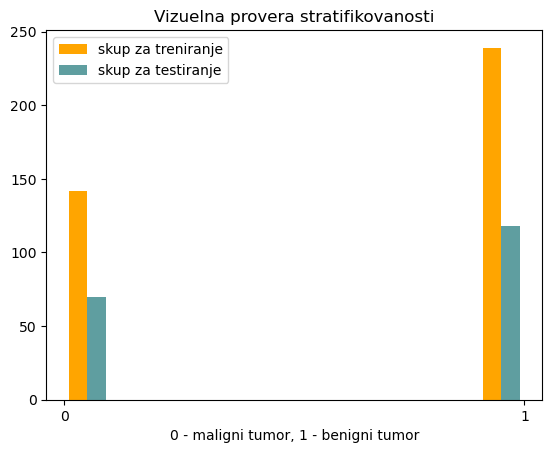

In [22]:
plt.title('Vizuelna provera stratifikovanosti')
plt.xticks([0,1])
plt.xlabel('0 - maligni tumor, 1 - benigni tumor')
plt.hist([y_train, y_test], color=['orange', 'cadetblue'], label=['skup za treniranje', 'skup za testiranje'])
plt.legend(loc='best')
plt.show()

### Standaradizacija podataka

Kako su vrednosti atributa prikazane na različitim skalama, izvršićemo i standardizaciju podataka.

In [23]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Obučavanje modela

Za kreiranje modela logističke regresije može se koristiti klasa `LogisticRegression` i njena metoda `fit`.

In [25]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

Rezultujući parametri se mogu pročitati kroz `intercept_` i `coef_` svojstva.

In [27]:
model.intercept_

array([0.33139143])

In [28]:
model.coef_

array([[-0.28727519, -0.50151142, -0.30972353, -0.4308113 , -0.09003909,
         0.46623744, -0.63451754, -0.57829295, -0.19659227,  0.29459857,
        -1.07342934,  0.17989966, -0.55244742, -0.88415885, -0.06947235,
         0.79871185, -0.1588476 , -0.41797521,  0.27914661,  0.45741765,
        -0.95396316, -1.1474478 , -0.75237502, -0.97147004, -0.58457538,
         0.08354706, -0.72722891, -0.89873624, -0.7055837 , -0.64250724]])

Interpretacija vrednosti koeficijenata je važna zbog razumevanja samog modela i uticaja atributa.

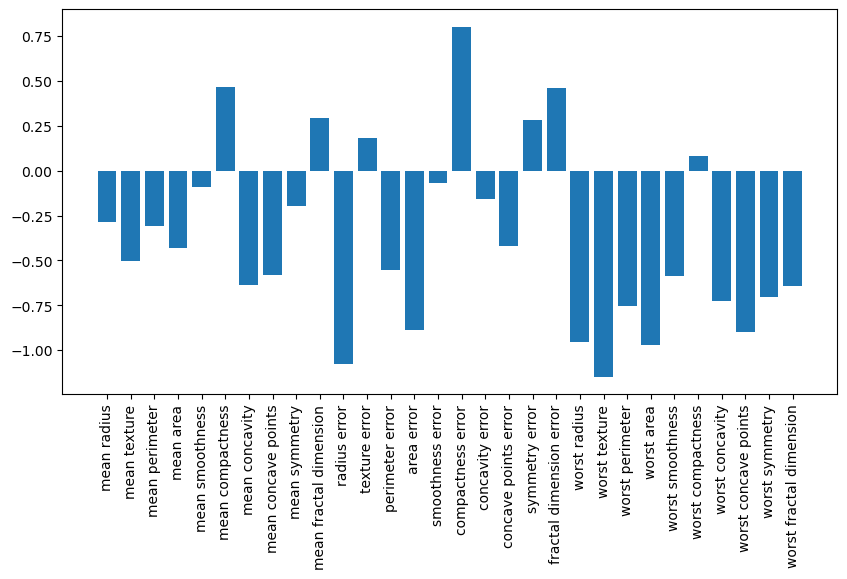

In [29]:
N = len(data.feature_names)
values = model.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(np.arange(0, N), values)
plt.xticks(np.arange(0, N), data.feature_names, rotation='vertical')

plt.show()

Na primer, na ovaj način se može uvideti da atributi kao što su `radius error`, `worst texture` ili `worst area` važni u predviđanju negativne klase tj. malignih tumora, dok je atribut `compactness error` važan za predikciju pozitivne klase tj. benignih tumora. 

### Evaluacija

Da bi se ocenio model klasifikacije, upoređuju se poznate vrednosti ciljne promenljive iz skupa za testiranje i dobijene predikcija modela. Predikcije modela se mogu dobiti korišćenjem funkcije `predict`.

In [30]:
y_test_predicted = model.predict(X_test)

Modeli klasifikacije se ocenjuju u terminima preciznosti, odziva, tačnosti i F1 ocene. Funkcije koje izračunavaju ove vrednosti se nalaze u paketu `metrics`.

In [31]:
metrics.accuracy_score(y_test, y_test_predicted)

0.9787234042553191

In [32]:
metrics.precision_score(y_test, y_test_predicted)

0.9913793103448276

In [33]:
metrics.recall_score(y_test, y_test_predicted)

0.9745762711864406

In [34]:
metrics.f1_score(y_test, y_test_predicted)

0.9829059829059829

Podsetimo se da ove mere uzimaju vrednosti iz raspona od 0 do 1 i da veće vrednosti ukazuju na bolje ponašanje modela.

Često se upoređuju ponašanje modela na skupu za treniranje i ponašanje modela na skupu za testiranje. Ukoliko postoji velika razlika u vrednostima koje se dobijaju, moguće je da je došlo do preprilagođavanja modela (engl. overfitting) ili podprilagođavanja modela (engl. underfitting).

In [35]:
y_train_predicted = model.predict(X_train)

In [36]:
train_accuracy = metrics.accuracy_score(y_train, y_train_predicted)

In [37]:
test_accuracy = metrics.accuracy_score(y_test, y_test_predicted)

In [38]:
print('Tačnost na skupu za treniranje: ', train_accuracy)
print('Tačnost na skupu za testiranje: ', test_accuracy)

Tačnost na skupu za treniranje:  0.989501312335958
Tačnost na skupu za testiranje:  0.9787234042553191


Sumarna evaluacija po klasama može se pročitati iz klasifikacionog izveštaja. Za njegovo kreiranje se može koristi funkcija `classification_report` paketa `metrics`.

In [39]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.99      0.97      0.98       118

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



`Makro prosek` (u klasifikacionom izveštaju obeležen kao `macro avg`) se računa kao aritmetička sredina dobijenih vrednosti po klasama. Na primer, makro prosek za F1-meru se računa kao $\frac{0.97+0.98}{2} = 0.975 $

`Težinski prosek` (u klasifikacionom izveštaju obeležen kao `weighted avg`) uzima u obzir i broj instanci koje služe kao potpora ocenjivanju. Na primer, težinski prosek za preciznost se računa kao $\frac{70}{188} \cdot 0.96 + \frac{118}{188} \cdot 0.99 = 0.978829$

Matrica konfuzije se može dobiti pozivom funkcije `confusion_matrix` paketa `metrics`.

In [40]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[ 69,   1],
       [  3, 115]])

Organizacija ove matrice je sledeća: 
- na poziciji (0, 0) se nalazi TN vrednost, 
- na poziciji (1, 0) FN vrednost, 
- na poziciji (1, 1) je TP vrednost, 
- i konačno, na poziciji (0, 1) je FP vrednost. 

Za detaljniju analizu prstora greški je često potrebno proučiti instance obeležene kao lažno pozitivne (FP) ili lažno negativne (FN). 

Na primer, na sledeći način se mogu izdvojiti lažno pozitivne (FP) instance tj. instance za koje važi da je `y_true = 0` i `y_predicted = 1`.


In [41]:
FP_mask = (y_test == 0) & (y_test_predicted == 1)

In [42]:
print('Broj lažno pozitivnih instanci: ', np.sum(FP_mask))

Broj lažno pozitivnih instanci:  1


In [43]:
FP_indexes = np.where(FP_mask == True)
print('Indeksi lažno pozitivnih instanci: ', FP_indexes)

Indeksi lažno pozitivnih instanci:  (array([38]),)


Možemo ispisati i izdvojenu lažno pozitivnu instancu.

In [44]:
X_test[FP_indexes]

array([[ 0.4871892 ,  0.01303733,  0.39338855,  0.3659976 , -1.30681649,
        -0.95126999, -0.60343925, -0.54482173, -0.94354475, -1.16554729,
        -0.65652153, -0.39907419, -0.70255831, -0.40017389, -1.38188071,
        -0.93387363, -0.75781829, -1.10270943, -1.32385874, -0.96100738,
         0.38108732,  0.91995101,  0.30136305,  0.22651728, -1.05909816,
        -0.47730201, -0.21514306, -0.44845648, -0.34868429, -0.84855669]])

Slično bi se izdvojile i lažno negativne (FN) instance tj. instance za koje važi `y_true = 1` i `y_predicted = 0`. 

In [45]:
FN_mask = (y_test == 1) & (y_test_predicted == 0)

In [46]:
print('Broj lažno negativnih instanci: ', np.sum(FN_mask))

Broj lažno negativnih instanci:  3


In [47]:
FN_indexes = np.where(FN_mask == True)
print('Indeksi lažno negativnih instanci: ', FN_indexes)

Indeksi lažno negativnih instanci:  (array([32, 95, 97]),)


Analize radi, možemo ispisati i lažno negativne instance.

In [48]:
X_test[FN_indexes]

array([[ 3.00787228e-01,  6.27191395e-01,  2.85068601e-01,
         1.66791649e-01, -8.26040721e-01, -4.08147858e-02,
        -2.39296242e-01, -2.59789211e-01,  5.21053213e-01,
        -5.27245251e-01, -3.06702066e-01,  2.36401902e-01,
        -2.73586042e-01, -2.48496739e-01, -8.50670363e-01,
         1.19740666e-01,  8.93328096e-02,  1.14354873e-02,
        -1.76444532e-01,  7.29323545e-02,  1.35367992e-01,
         9.01300544e-01,  1.23681584e-01,  7.27469626e-03,
        -1.08945584e+00,  4.81254812e-01,  1.97050595e-01,
         2.61877395e-01,  4.21965089e-01,  4.20941512e-01],
       [-1.49137756e+00, -4.48140625e-01, -1.41384422e+00,
        -1.19357933e+00,  7.01757825e-01,  7.21499884e-01,
         3.11920158e+00, -1.21566444e-01,  1.13714354e+00,
         2.36955951e+00, -2.72035273e-01, -3.12066536e-02,
        -5.08525753e-01, -5.08240856e-01,  8.18567326e-01,
         3.33916396e+00,  1.15489460e+01,  3.50196318e+00,
         2.76725754e+00,  2.21980946e+00, -1.24279694e+

### Analiza sigurnosti klasifikatora

Biblioteka omogućava da se pomoću funkcije modela `predict_proba` za svaku instancu pojedinačno dobiju i ocene verovatnoća pripadnosti pozitivnoj tj. negativnoj klasi. 

Na primer, za prvih 10 instanci klasifikator daje sledeći rezultat: 

In [49]:
y_test_predicted[0:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

Verovatnoće pripadnosti negativnoj tj. pozitivnoj klasi za ovih 10 instanci se mogu dobiti sledećim kodom:

In [50]:
y_probabilities_predicted = model.predict_proba(X_test)
y_probabilities_predicted[0:10]

array([[3.44877829e-01, 6.55122171e-01],
       [2.55179805e-02, 9.74482019e-01],
       [2.54202808e-03, 9.97457972e-01],
       [3.77585159e-05, 9.99962241e-01],
       [9.99992928e-01, 7.07199283e-06],
       [6.73238684e-03, 9.93267613e-01],
       [3.35553641e-05, 9.99966445e-01],
       [9.96622595e-01, 3.37740459e-03],
       [1.54688817e-01, 8.45311183e-01],
       [2.11451968e-04, 9.99788548e-01]])

Oko predikcije nekih vrednosti klasifikator može biti vrlo siguran, dok u nekim slučajevima to ne mora biti tako. Postavljanjem odgovarajućeg praga može se vršiti prilagođavanje problemu koji se rešava i uticati na strogost klasifikatora. Podrazumevana vrednost praga je 0.5.

In [51]:
model_confidence = []

In [52]:
for p in y_probabilities_predicted: 
    model_confidence.append(np.abs(p[0]-p[1]))

In [53]:
model_confidence = np.array(model_confidence)

Sada možemo prikazati redne brojeve instanci skupa za testiranje uređene na osnovu sigurnosti klasifikatora u svoju odluku. Prvo ćemo navesti indekse instanci oko čije klasifikacije je klasifikator najmanje siguran.

In [54]:
model_confidence.argsort()

array([ 98, 126, 177,  97,   0, 124,  38,  95,  32, 137, 186, 143, 170,
         8,  27,  56,  39, 159, 123, 106, 183, 129,  20,  86,  44,  83,
       171, 121,  80, 114, 151,  89, 179, 154,  92, 118,  62,  13, 155,
        28,   1,  29,  15,  72,  64, 181,  19,  45, 127, 184, 109,  17,
        75,  50, 173, 102,  57, 140,  79,  66,  77,   5,  37,  47, 119,
       180, 187,  26, 149, 138,  99,   7, 146,  94, 101,  11,  69,   2,
       134,  46, 174, 175,  59,  71,  73, 135, 150,  54,  63,  60,  41,
       122, 141, 131, 147,  16,  53, 144,  25, 133,  30,  43, 176, 136,
       169, 100,  21,  34,  85, 111, 104,  55,  68, 125,  48, 108,  93,
        87, 164,  65, 172,   9,  35,  31,  90, 107,  23,  96,  91,  88,
        81, 115, 165,  78, 158,  49, 145, 112, 167, 163, 161,  52,  70,
       182, 130,  24, 105, 168, 110,   3, 142,   6,  74, 132, 166, 120,
        36,  18, 139,   4, 178, 156,  51,  12,  14, 148, 113,  84, 128,
       160, 185,  82, 116,  33, 162, 117,  61, 152,  22,  67, 15

Dalje ćemo prikazati sigurnost klasifikatora u odluku počevši od najmanje vrednosti.

In [55]:
model_confidence.sort()

In [56]:
model_confidence

array([0.14334116, 0.15300406, 0.22841315, 0.28016075, 0.31024434,
       0.32451815, 0.32783095, 0.33140411, 0.38029138, 0.56629974,
       0.59976409, 0.62500491, 0.64821356, 0.69062237, 0.77233027,
       0.7903818 , 0.79470562, 0.80283109, 0.8084407 , 0.80923665,
       0.83450218, 0.85415984, 0.85471234, 0.86585066, 0.8804705 ,
       0.88340285, 0.88398435, 0.89087379, 0.90058199, 0.90302821,
       0.90893648, 0.91077523, 0.91086404, 0.91975533, 0.92761281,
       0.9364612 , 0.93649939, 0.9400431 , 0.94068067, 0.94379968,
       0.94896404, 0.94902409, 0.95261404, 0.95434975, 0.9546138 ,
       0.95729399, 0.96509736, 0.97017015, 0.97258196, 0.97434584,
       0.97644574, 0.97779688, 0.98193991, 0.98279101, 0.98319053,
       0.98397588, 0.98420675, 0.98464077, 0.98471091, 0.98561979,
       0.98596988, 0.98653523, 0.98677228, 0.98681818, 0.98696988,
       0.98799768, 0.98834401, 0.98962889, 0.99172758, 0.9927422 ,
       0.99274827, 0.99324519, 0.99413536, 0.99424825, 0.99432

Slična funkcionalnost je dostupna i preko metode `predict_log_proba` modela. Jedina razlika je u tome što su verovatnoće pripadanja na logaritamskoj skali. 

In [57]:
y_log_probabilities_predicted = model.predict_log_proba(X_test)
y_log_probabilities_predicted[0:10]

array([[-1.06456504e+00, -4.22933541e-01],
       [-3.66837196e+00, -2.58492112e-02],
       [-5.97479306e+00, -2.54526452e-03],
       [-1.01842995e+01, -3.77592287e-05],
       [-7.07201784e-06, -1.18593682e+01],
       [-5.00082554e+00, -6.75515158e-03],
       [-1.03023138e+01, -3.35559270e-05],
       [-3.38312090e-03, -5.69064774e+00],
       [-1.86633982e+00, -1.68050455e-01],
       [-8.46151269e+00, -2.11474327e-04]])

### Čuvanje modela i buduće korišćenje

Za čuvanje modela može se koristiti paket `pickle` i njegova metoda `dump` za serijalizaciju.

In [58]:
import pickle

In [59]:
with open('models/lr_classifier.model.pickle', 'wb') as model_file:
    pickle.dump(model, model_file)

In [60]:
with open('models/lr_classifier.scaler.pickle', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Pre budućeg korišćenja, model i skaler se mogu deserijalizovati korišćenjem metode `load` paketa `pickle`.

In [61]:
with open('models/lr_classifier.model.pickle', 'rb') as model_file:
    model_revived = pickle.load(model_file)

In [62]:
with open('models/lr_classifier.scaler.pickle', 'rb') as scaler_file:
    scaler_revived = pickle.load(scaler_file)

Kada bude potrebno klasifikovati novu instancu `x_new` mogu se preduzeti sledeći koraci: 

In [63]:
x_new = np.random.rand(N).reshape(1, -1)

In [64]:
x_new_transformed = scaler_revived.transform(x_new)

/home/ognjen/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
y_new = model_revived.predict(x_new_transformed)

In [66]:
y_new

array([1])